# Анализ факторов, влияющих на успеваемость студентов

## Основная информация о проекте

**Цель исследования** - выявление факторов, влияющих на успеваемость студентов, прогнозирование успеваемости студентов, поступающих в университеты Нигерии, разработка решений для улучшения результатов. 

<span style="color:blue"> (В процессе)</span> **Задачи исследования**:
- Выполнить предобработку данных: анализ пропусков, дубликатов, количественных и категориальных данных, категоризация;
- Провести исследовательский анализ данных: 

**Источники исследования**: датасет "Students Performance in 2024 JAMB", созданный с использованием статистики экзамена JAMB 2024 года для прогнозирования успеваемости студентов, поступающих в университеты Нигерии. 

**Описание датасета:** содержит 17 столбцов и 5000 записей. Приведем описание столбцов:

* `JAMB_Score` - оценка, полученная студентом на экзамене JAMB. Тип данных: числовой дискретный;
* `Study_Hours_Per_Week` - количество часов, которые студент посвящает учебе в неделю. Тип данных: числовой дискретный;
* `Attendance_Rate` - процент дней, которые студент посещал школу в течение учебного года. Тип данных: числовой дискретный;
* `Teacher_Quality` - качество преподавания в школе, оцениваемое по шкале от 1 до 5. Тип данных: категориальный порядковый;
* `Distance_To_School` - расстояние, которое преодолевает студент, чтобы добраться до школы. Тип данных: числовой непрерывный;
* `School_Type` - тип школы, которую посещает студент. Тип данных: категориальный номинальный;
* `School_Location` - местоположение школы. Тип данных: категориальный номинальный;
* `Extra_Tutorials` - наличие у студента допонительных учебных пособий. Тип данных: категориальный бинарный;
* `Access_To_Learning_Materials` - наличие у студента доступа к учебникам и интернету. Тип данных: категориальный бинарный;
* `Parent_Involvement` - степень вовлеченности родителей в обучение. Тип данных: категориальный номинальный;
* (?) `IT_Knowledge` - умение учащегося использовать компьютер. Тип данных: категориальный номинальный;
* `Student_ID` - идентификатор студента. Тип данных: числовой дискретный;
* `Age` - возраст студента. Тип данных: числовой дискретный;
* `Gender` - пол студента. Тип данных: категориальный номинальный;
* `Socioeconomic_Status` - социально-экономическое положение семьи студента. Тип данных: категориальный номинальный;
* `Parent_Education_Level` - уровень образования родителей студента. Тип данных: категориальный номинальный;
* (?) `Assignments_Completed` - уровень выполнения заданий студентом. Тип данных: числовой дискретный. 

<span style="color:blue"> (В процессе)</span> **Оглавление**:

## Подготовка к работе и знакомство с датасетом

In [1]:
# импорт необходимых для работы библиотек

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import KMeans
import itertools

In [2]:
# улучшение качества графиков

%config InlineBackend.figure_format = 'retina'

In [3]:
# выгрузка датасета

jamb = pd.read_csv('/Users/mimikhailova/Downloads/jamb_exam_results.csv')

In [4]:
# функция для получения общей информации о датасете

def general_info(data):
    try:
        print('Первые пять строк датасета:')
        display(data.head(5))
        print('\nОбщая информация о датасете:\n')
        display(data.info())
        print('\nCтатистические характеристики количественных признаков:')
        display(data.describe().transpose())
        print(f'\nКоличество явных дубликатов: {data.duplicated().sum()}')
        print(f'\nКоличество пропусков:\n{data.isna().sum()}')
        
        pass_values(data)
        
    except:
        print(f'Произошла ошибка в основной функции')
    
def pass_values(data):
    try:
        pass_values = (data.isna().mean()*100).sort_values(ascending=True)
        plt.figure(figsize=(10,5))
        plt.barh(pass_values.index, pass_values, color='#00B7C2', alpha=0.7)
        plt.title('Визуализация пропущенных значений в процентах\n', fontsize=14)
        plt.xlabel('\nПроцент пропусков', fontsize=12)
        plt.ylabel('Столбцы таблицы\n', fontsize=12)
        plt.xlim(0, 100)
        for i, v in enumerate(pass_values):
            plt.text(v, i, f'{v:.2f}%', color='#01204E', va='center')
    except:
        print('Пропусков не осталось, или произошла ошибка в функции pass_values')

Первые пять строк датасета:


,JAMB_Score,Study_Hours_Per_Week,Attendance_Rate,Teacher_Quality,Distance_To_School,School_Type,School_Location,Extra_Tutorials,Access_To_Learning_Materials,Parent_Involvement,IT_Knowledge,Student_ID,Age,Gender,Socioeconomic_Status,Parent_Education_Level,Assignments_Completed
0,192,22,78,4,12.4,Public,Urban,Yes,Yes,High,Medium,1,17,Male,Low,Tertiary,2
1,207,14,88,4,2.7,Public,Rural,No,Yes,High,High,2,15,Male,High,NaN,1
2,182,29,87,2,9.6,Public,Rural,Yes,Yes,High,Medium,3,20,Female,High,Tertiary,2
3,210,29,99,2,2.6,Public,Urban,No,Yes,Medium,High,4,22,Female,Medium,Tertiary,1
4,199,12,98,3,8.8,Public,Urban,No,Yes,Medium,Medium,5,22,Female,Medium,Tertiary,1



Общая информация о датасете:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   JAMB_Score                    5000 non-null   int64  
 1   Study_Hours_Per_Week          5000 non-null   int64  
 2   Attendance_Rate               5000 non-null   int64  
 3   Teacher_Quality               5000 non-null   int64  
 4   Distance_To_School            5000 non-null   float64
 5   School_Type                   5000 non-null   object 
 6   School_Location               5000 non-null   object 
 7   Extra_Tutorials               5000 non-null   object 
 8   Access_To_Learning_Materials  5000 non-null   object 
 9   Parent_Involvement            5000 non-null   object 
 10  IT_Knowledge                  5000 non-null   object 
 11  Student_ID                    5000 non-null   int64  
 12  Age                           5

None


Cтатистические характеристики количественных признаков:


,count,mean,std,min,25%,50%,75%,max
JAMB_Score,5000.0,174.07460,47.616477,100.0,135.00,170.0,209.00,367.0
Study_Hours_Per_Week,5000.0,19.52120,9.634569,0.0,13.00,19.0,26.00,40.0
Attendance_Rate,5000.0,84.23520,9.485688,50.0,78.00,84.0,91.00,100.0
Teacher_Quality,5000.0,2.52140,0.985564,1.0,2.00,2.0,3.00,5.0
Distance_To_School,5000.0,10.00546,4.820221,0.0,6.60,10.0,13.40,20.0
Student_ID,5000.0,2500.50000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,18.44580,2.301504,15.0,16.00,18.0,20.00,22.0
Assignments_Completed,5000.0,1.80460,0.992076,1.0,1.00,1.0,2.00,5.0



Количество явных дубликатов: 0

Количество пропусков:
JAMB_Score                        0
Study_Hours_Per_Week              0
Attendance_Rate                   0
Teacher_Quality                   0
Distance_To_School                0
School_Type                       0
School_Location                   0
Extra_Tutorials                   0
Access_To_Learning_Materials      0
Parent_Involvement                0
IT_Knowledge                      0
Student_ID                        0
Age                               0
Gender                            0
Socioeconomic_Status              0
Parent_Education_Level          891
Assignments_Completed             0
dtype: int64


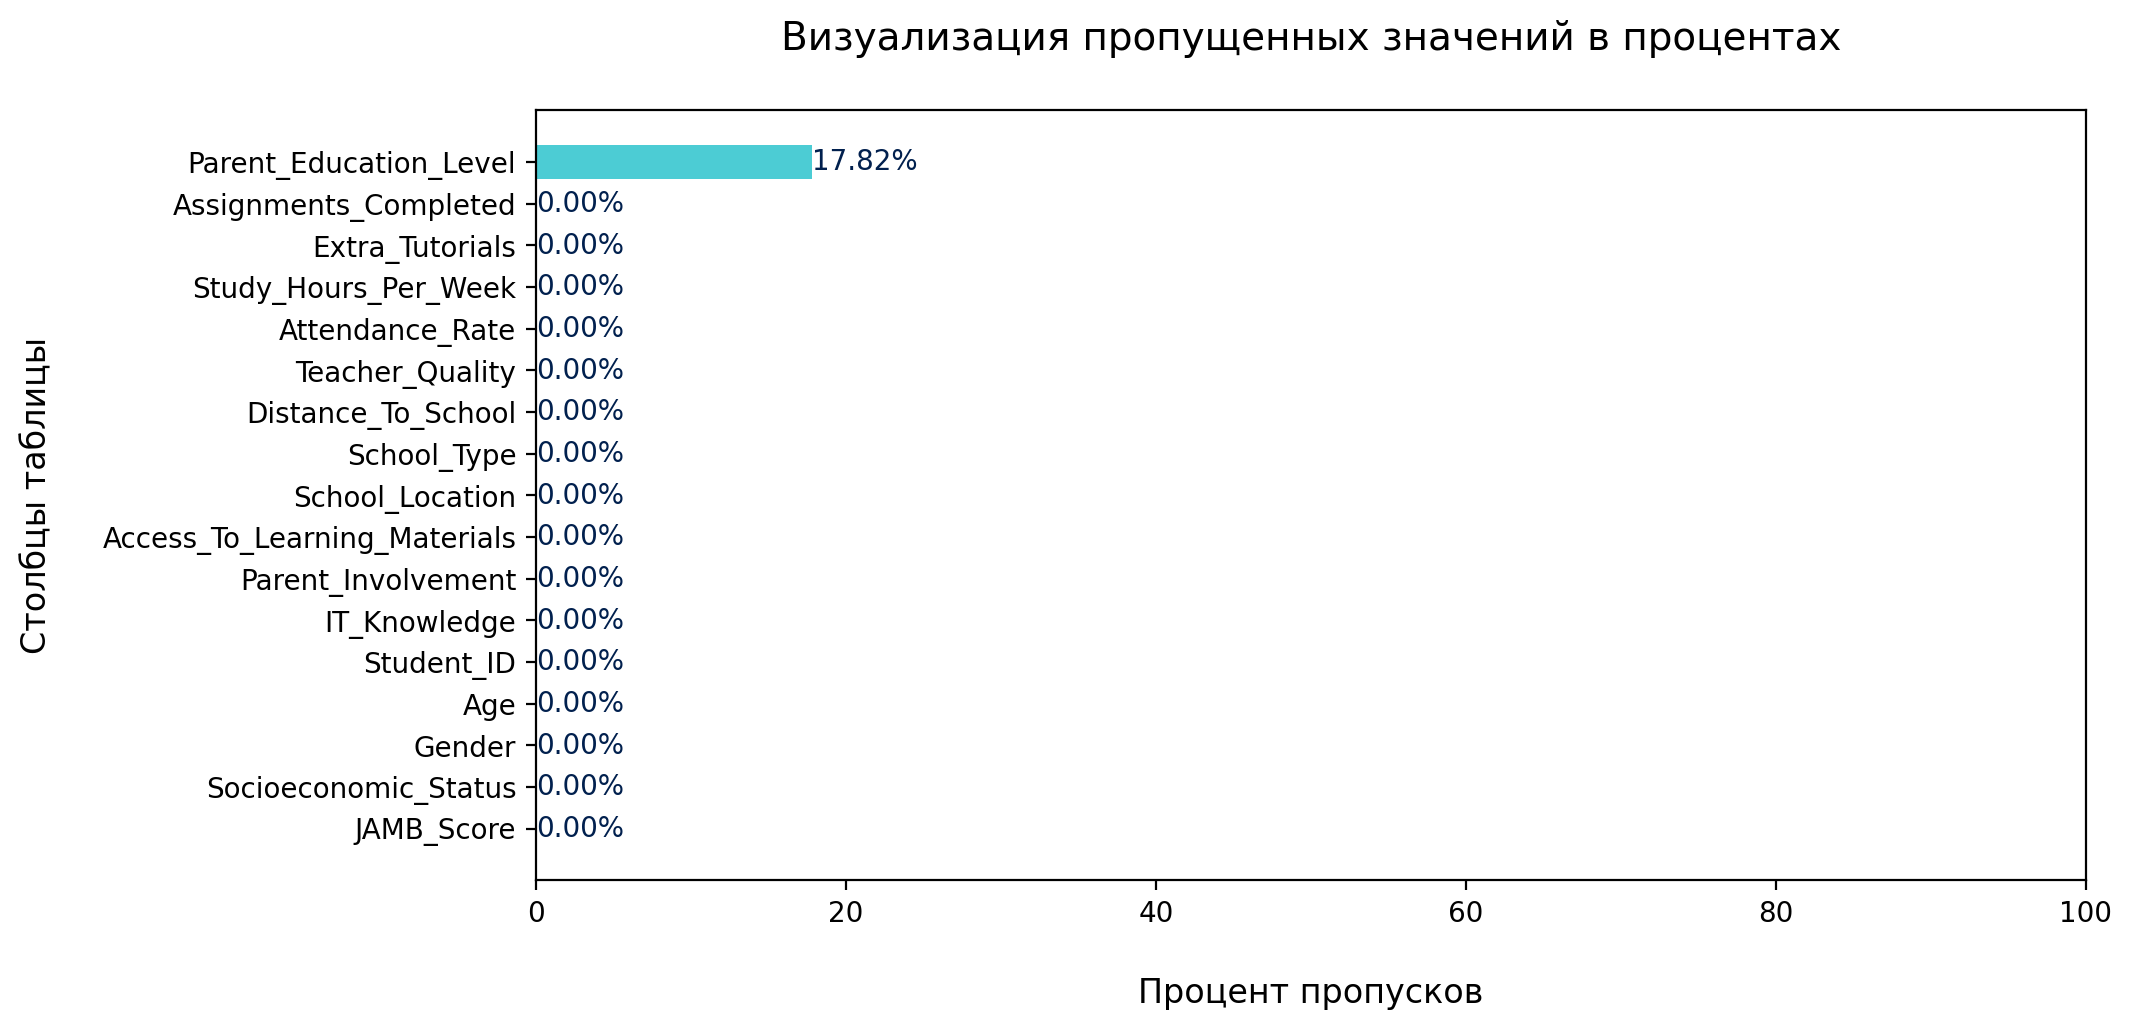

In [5]:
general_info(jamb)

📌 **Выводы по знакомству с данными**:

* Датасет включает в себя 5000 записей о студентах, сдающих JAMB. Состоит из 17 полей – характеристик для каждого студента; 
* Для удобства дальнейшего исследования названия полей требуют приведения к нижнему регистру;
* Необходимости в преобразовании типов данных нет;
* Есть пропущенные значения в столбце `Parent_Education_Level` – они составляют ≈17.82% от всего датасета. 

____

📌 **Первые выводы о статистических характеристиках количественных признаков**:


`JAMB_Score`:
* Баллы за экзамен варьируется от 100 до 367 баллов;
* Средний балл равен ≈174.07, а медианный – 170. Более высокий средний балл сигнализирует о наличии выбросов; 
* Стандартное отклонение (≈47.62) говорит о том, что баллы студентов варьируются довольно сильно.


`Study_Hours_Per_Week`:
* Количество часов, которые студенты посвящают учебе в неделю, находятся в диапазоне от 0 до 40 часов;
* В среднем студенты посвящают учебе ≈19.52 часа в неделю, при этом половина всех студентов тратит на учебу не более 19 часов. Среднее значение и медиана близки друг к другу, что может указывать на то, что распределение данных относительно симметрично и не содержит значительных выбросов;
* Стандартное отклонение (≈9.63) говорит о том, что есть студенты, которые тратят значительно меньше или больше времени на учебу. 

`Attendance_Rate`:
* Процент, характеризующий количество дней, который студенты посещают школу в течение учебного года, колеблется от 50 до 100%;
* В среднем студенты посещают школу ≈84.24% от всего учебного года. Медианное значение данного признака (82%) почти не отличается от среднего, что указывает на отсутствие сильных выбросов;
* Стандартное отклонение (≈9.49) указывает на наличие студентов, которые посещают учебное заведение значительное меньше или больше.


`Teacher_Quality`:
* Качество преподавания в школе оценивается от 1 до 5, и датасет включает все возможные значения;
* В среднем качество преподавания оценивается на 2.52 балла, и половина студентов поставила оценку не более 2 баллов. Средний и медианный балл близки друг к другу, что указывает на отсутствие значительных выбросов;
* Стандартное отклонение (≈0.99) незначительно, что указывает на однородность данных по рассматриваемому признаку. 


`Distance_To_School`:
* Расстояние, которое преодолевает студент, чтобы добраться до школы, колеблется от 0 до 20 км. Однако значение "0" может быть аномальным, и его стоит рассмотреть отдельно;
* Среднее расстояние до школы равно ≈10.01 км и совпадает с медианным. Это значит, что распределение расстояний значительных выбросов не содержит;


`Age`:
* Возраст студентов варьируется от 15 до 22 лет;
* Средний возраст студентов равен ≈18.45 и он очень близок к медианному значению возраста – 18 лет; 
* Небольшое стандартное отклонение (≈2.3) говорит о том, что данные достаточно однородны. 

## Предобработка данных

### Переименование столбцов

Для удобства дальнейшего анализа приведем к нижнему регистру названия всех полей:

In [6]:
# приведение названия полей к нижнему регистру

jamb.columns = jamb.columns.str.lower()

In [7]:
# check

jamb.columns

Index(['jamb_score', 'study_hours_per_week', 'attendance_rate',
       'teacher_quality', 'distance_to_school', 'school_type',
       'school_location', 'extra_tutorials', 'access_to_learning_materials',
       'parent_involvement', 'it_knowledge', 'student_id', 'age', 'gender',
       'socioeconomic_status', 'parent_education_level',
       'assignments_completed'],
      dtype='object')

### Обработка пропущенных значений

Пропущенные значения содержатся только в одном столбце `parent_education_level`, характеризующим уровень образования родителей. Пропущенные значения могут означать как отсутствие образования, так и отсутствие информации об образовании (например, родители погибли, и студент не может получить ответа на этот вопрос). 

Так как количество строк с пропущенными значениями >10%, удалять их мы не будем. 

Исследуем уникальные значения в столбце `parent_education_level`:

In [8]:
# уникальные значения столбца `parent_education_level`

jamb['parent_education_level'].unique()

array(['Tertiary', nan, 'Primary', 'Secondary'], dtype=object)

Три уникальных значения – начальное, среднее и высшее. 

Однозначно определить, является ли `nan` отсутствием образования или же <u>отсутствием информации</u> об образовании, мы не можем, поэтому для возможности дальнейшего исследования поставим заглушку `unknown`:

In [9]:
# замена пропущенного значения

jamb['parent_education_level'] = jamb['parent_education_level'].fillna('Unknown')

In [10]:
# check

jamb['parent_education_level'].unique()

array(['Tertiary', 'Unknown', 'Primary', 'Secondary'], dtype=object)

### Обработка дубликатов

Проверим датасет на наличие явных дубликатов

In [11]:
# поиск явных дубликатов

jamb.duplicated().sum()

0

Дубликаты отсутствуют. 

Проверим датасет на наличие неявных дубликатов по значению в столбце `student_id`:

In [12]:
# поиск неявных дубликатов по столбцу `student_id`

jamb.duplicated(subset=['student_id']).sum()

0

Неявные дубликаты отсутствуют. 

📌 **Результаты предобработки:**
* Названия стобцов были приведены к нижнему регистру для удобства дальнейшего исследования;
* В столбце `parent_education_level` пропущенные значения были изменены на значение *"Unknown"*;
* В результате проверки на дубликаты дубликаты не обнаружены. 

## Исследовательский анализ данных

### Исследование распределения числовых признаков

На моменте исследования статистик количественных переменных в столбце `distance_to_school` были замечены нулевые значения:

In [13]:
# срез по нулевым значениям в distance_to_school

jamb.query('distance_to_school == 0')

,jamb_score,study_hours_per_week,attendance_rate,teacher_quality,distance_to_school,school_type,school_location,extra_tutorials,access_to_learning_materials,parent_involvement,it_knowledge,student_id,age,gender,socioeconomic_status,parent_education_level,assignments_completed
93,116,1,85,3,0.0,Public,Rural,Yes,No,High,Medium,94,16,Male,High,Tertiary,1
130,107,0,77,1,0.0,Private,Urban,No,Yes,Medium,High,131,20,Male,Medium,Primary,1
156,226,29,98,4,0.0,Private,Urban,Yes,Yes,Medium,High,157,15,Female,Medium,Secondary,4
202,168,17,98,3,0.0,Private,Rural,Yes,No,Low,High,203,15,Male,Low,Primary,1
220,142,27,100,1,0.0,Public,Rural,No,Yes,High,High,221,17,Female,Medium,Secondary,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4812,278,22,82,5,0.0,Public,Urban,Yes,No,High,High,4813,20,Male,Medium,Tertiary,1
4825,246,18,100,3,0.0,Public,Urban,No,No,Low,Low,4826,15,Male,Medium,Secondary,2
4830,128,19,90,2,0.0,Public,Urban,No,Yes,Medium,Low,4831,15,Male,Medium,Secondary,2
4911,148,11,88,3,0.0,Public,Urban,Yes,Yes,Low,High,4912,16,Female,Low,Secondary,1


Так как единица измерения столбца километры, можно предположить, что значение в 0.0 км означает, что школа находится на расстоянии менее 1 км. Однако так как этих значений 116, ≈2.32% всех записей, их можно удалить, не исказив дальнейшее исследование:

In [14]:
# новая таблица без аномальных значений в столбце distsance_to_school

jamb = jamb.query('distance_to_school > 0')

In [15]:
# check

jamb.shape

(4884, 17)

Также в датасете есть нулевые значения в столбце `study_hours_per_week`, которые могут означать, что студент тратит на учебу 0 часов в неделю:

In [27]:
# срез по нулевым значениям в study_hours_per_week

jamb.query('study_hours_per_week == 0')

,jamb_score,study_hours_per_week,attendance_rate,teacher_quality,distance_to_school,school_type,school_location,extra_tutorials,access_to_learning_materials,parent_involvement,it_knowledge,student_id,age,gender,socioeconomic_status,parent_education_level,assignments_completed
28,153,0,91,2,9.9,Private,Rural,Yes,Yes,Medium,High,29,22,Female,Low,Primary,1
51,185,0,96,4,12.5,Public,Rural,No,No,Low,Low,52,16,Female,High,Tertiary,1
56,108,0,82,1,3.3,Public,Urban,No,Yes,High,High,57,18,Female,High,Tertiary,1
115,108,0,70,2,7.9,Public,Rural,No,Yes,Medium,Medium,116,22,Male,Medium,Primary,1
135,150,0,65,1,11.7,Public,Rural,Yes,Yes,Medium,Low,136,22,Female,Low,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4903,100,0,80,1,20.0,Private,Urban,No,Yes,Low,Medium,4904,22,Female,Medium,Tertiary,1
4936,149,0,79,2,16.6,Public,Rural,Yes,Yes,Low,Low,4937,15,Female,Medium,Secondary,1
4944,110,0,66,1,13.4,Public,Rural,No,No,Low,Medium,4945,18,Male,Low,Secondary,1
4962,135,0,83,3,7.1,Private,Urban,Yes,Yes,Low,Low,4963,22,Female,Medium,Primary,1


При этом заметим, что в столбец `attendance_rate`, описывающий количество посещенных учебных дней, не равен 0. В таком случае возникает неоднозначность трактовки столбца `study_hours_per_week`: входят ли туда учебные часы или имеется ввиду самостоятельная учеба вне?  

Таких значений ≈2.68% всех записей, поэтому их можно удалить, не исказив дальнейшее исследование:

In [28]:
# новая таблица без аномальных значений в столбце study_hours_per_week

jamb = jamb.query('study_hours_per_week > 0')

In [30]:
# check 4753/5000 -> потеряли ≈4.94% информации, что в пределах нормы

jamb.shape

(4753, 17)

Теперь построим гистограммы распределения всех числовых признаков, представленных в датасете:

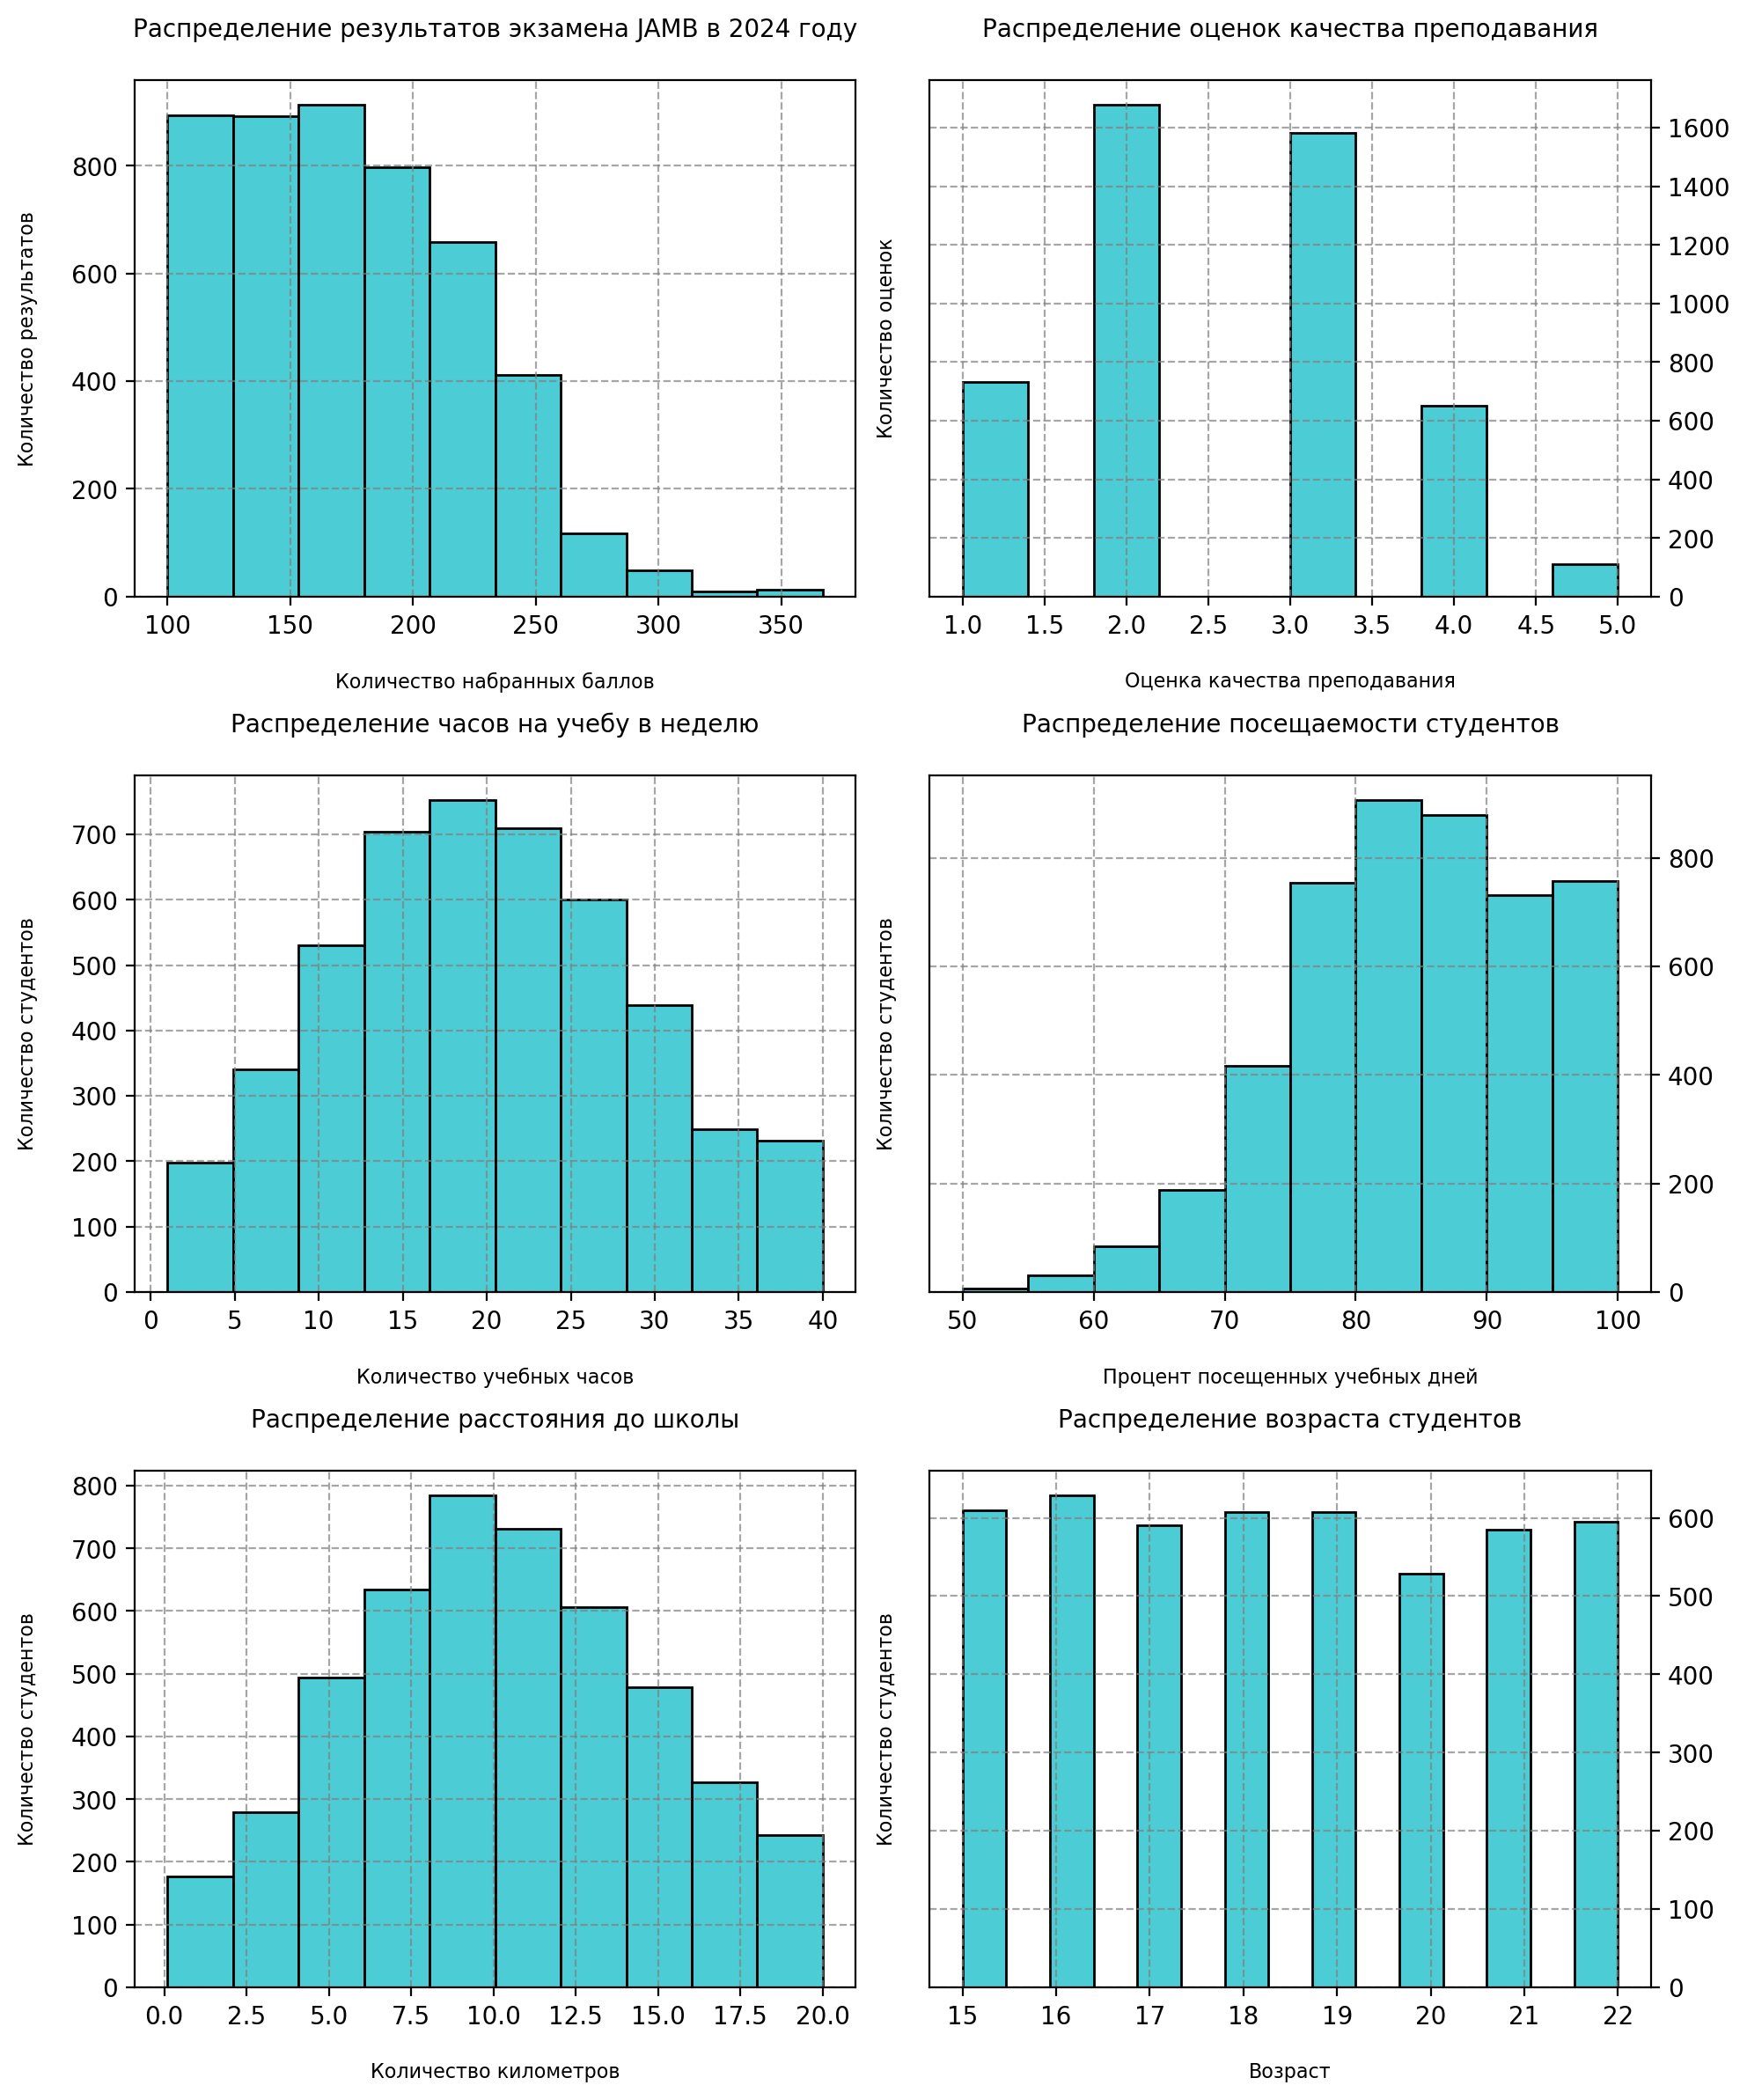

In [47]:
# построение гистограмм распределения количественных признаков

fig, axs = plt.subplots(3, 2, figsize=(10, 12))

sns.histplot(jamb['jamb_score'], bins=10, color='#00b7c2', alpha=0.7, ax=axs[0,0])
axs[0,0].set_title('Распределение результатов экзамена JAMB в 2024 году\n', fontsize=10)
axs[0,0].set_xlabel('\nКоличество набранных баллов', fontsize=8)
axs[0,0].set_ylabel('Количество результатов\n', fontsize=8)
axs[0,0].grid(linestyle='--', color='gray', alpha=0.7)

sns.histplot(jamb['teacher_quality'], bins=10, color='#00b7c2', alpha=0.7, ax=axs[0,1])
axs[0,1].set_title('Распределение оценок качества преподавания\n', fontsize=10)
axs[0,1].set_xlabel('\nОценка качества преподавания', fontsize=8)
axs[0,1].set_ylabel('Количество оценок\n', fontsize=8)
axs[0,1].grid(linestyle='--', color='gray', alpha=0.7)
axs[0,1].yaxis.tick_right()

sns.histplot(jamb['study_hours_per_week'], bins=10, color='#00b7c2', alpha=0.7, ax=axs[1,0])
axs[1,0].set_title('Распределение часов на учебу в неделю\n', fontsize=10)
axs[1,0].set_xlabel('\nКоличество учебных часов', fontsize=8)
axs[1,0].set_ylabel('Количество студентов\n', fontsize=8)
axs[1,0].grid(linestyle='--', color='gray', alpha=0.7)

sns.histplot(jamb['attendance_rate'], bins=10, color='#00b7c2', alpha=0.7, ax=axs[1,1])
axs[1,1].set_title('Распределение посещаемости студентов\n', fontsize=10)
axs[1,1].set_xlabel('\nПроцент посещенных учебных дней', fontsize=8)
axs[1,1].set_ylabel('Количество студентов\n', fontsize=8)
axs[1,1].grid(linestyle='--', color='gray', alpha=0.7)
axs[1,1].yaxis.tick_right()

sns.histplot(jamb['distance_to_school'], bins=10, color='#00b7c2', alpha=0.7, ax=axs[2,0])
axs[2,0].set_title('Распределение расстояния до школы\n', fontsize=10)
axs[2,0].set_xlabel('\nКоличество километров', fontsize=8)
axs[2,0].set_ylabel('Количество студентов\n', fontsize=8)
axs[2,0].grid(linestyle='--', color='gray', alpha=0.7)

sns.histplot(jamb['age'], bins=15, color='#00b7c2', alpha=0.7, ax=axs[2,1])
axs[2,1].set_title('Распределение возраста студентов\n', fontsize=10)
axs[2,1].set_xlabel('\nВозраст', fontsize=8)
axs[2,1].set_ylabel('Количество студентов\n', fontsize=8)
axs[2,1].grid(linestyle='--', color='gray', alpha=0.7)
axs[2,1].yaxis.tick_right()

plt.tight_layout()
plt.show()

📌 **Выводы:**
* Наибольшее количество студентов получили за экзамен в 2024 году от 100 до 200 баллов. Эти значения близки к минимальным проходным баллам для поступления: 140 для университетов, 100 для педагогических колледжей и 100 для политехнических, монотехнических вузов и инновационным предпринимательским институтам (Источник: https://www.jamb.gov.ng/);
* Наибольшее количество студентов не удовлетворены качеством образования: >3000 студентов оценили его на 2-3 балла. Количество студентов, абсолютно недовольных образованием (поставили 1) составляет более 750 человек. Около половины студентов оценили преподавания оценками 1-2, оценками 1-3 оценили качество преподавания более 80% студентов;
* Гистограмма распределения учебных часов в неделю распределена нормально. Большинство студентов уделяют учебе от 10 до 30 часов в неделю.
* Среди студентов нет тех, кто посещал бы школу менее 50% дней учебного года. Большинство студентов ходят в школу не менее 80% дней учебного года; 
* Гистограмма расстояния до школы распределена нормально. Для большинства студентов расстояние до школы колеблется в диапазоне от 5 до 15 км;
* Возраст студентов распределен равномерно между 15 и 22 годами. Наименьшее количество студентов, сдающих JAMB, возраста 20 лет. 

### Исследование взаимосвязей между числовыми признаками

Построим диаграммы рассеяния для анализа взаимосвязей между:
* Результатом экзамена и количеством часов, уделяемым учебе в неделю;
* Результатом экзамена и процентом посещаемости школы за год;
* Результатом экзамена и расстоянием до школы. 

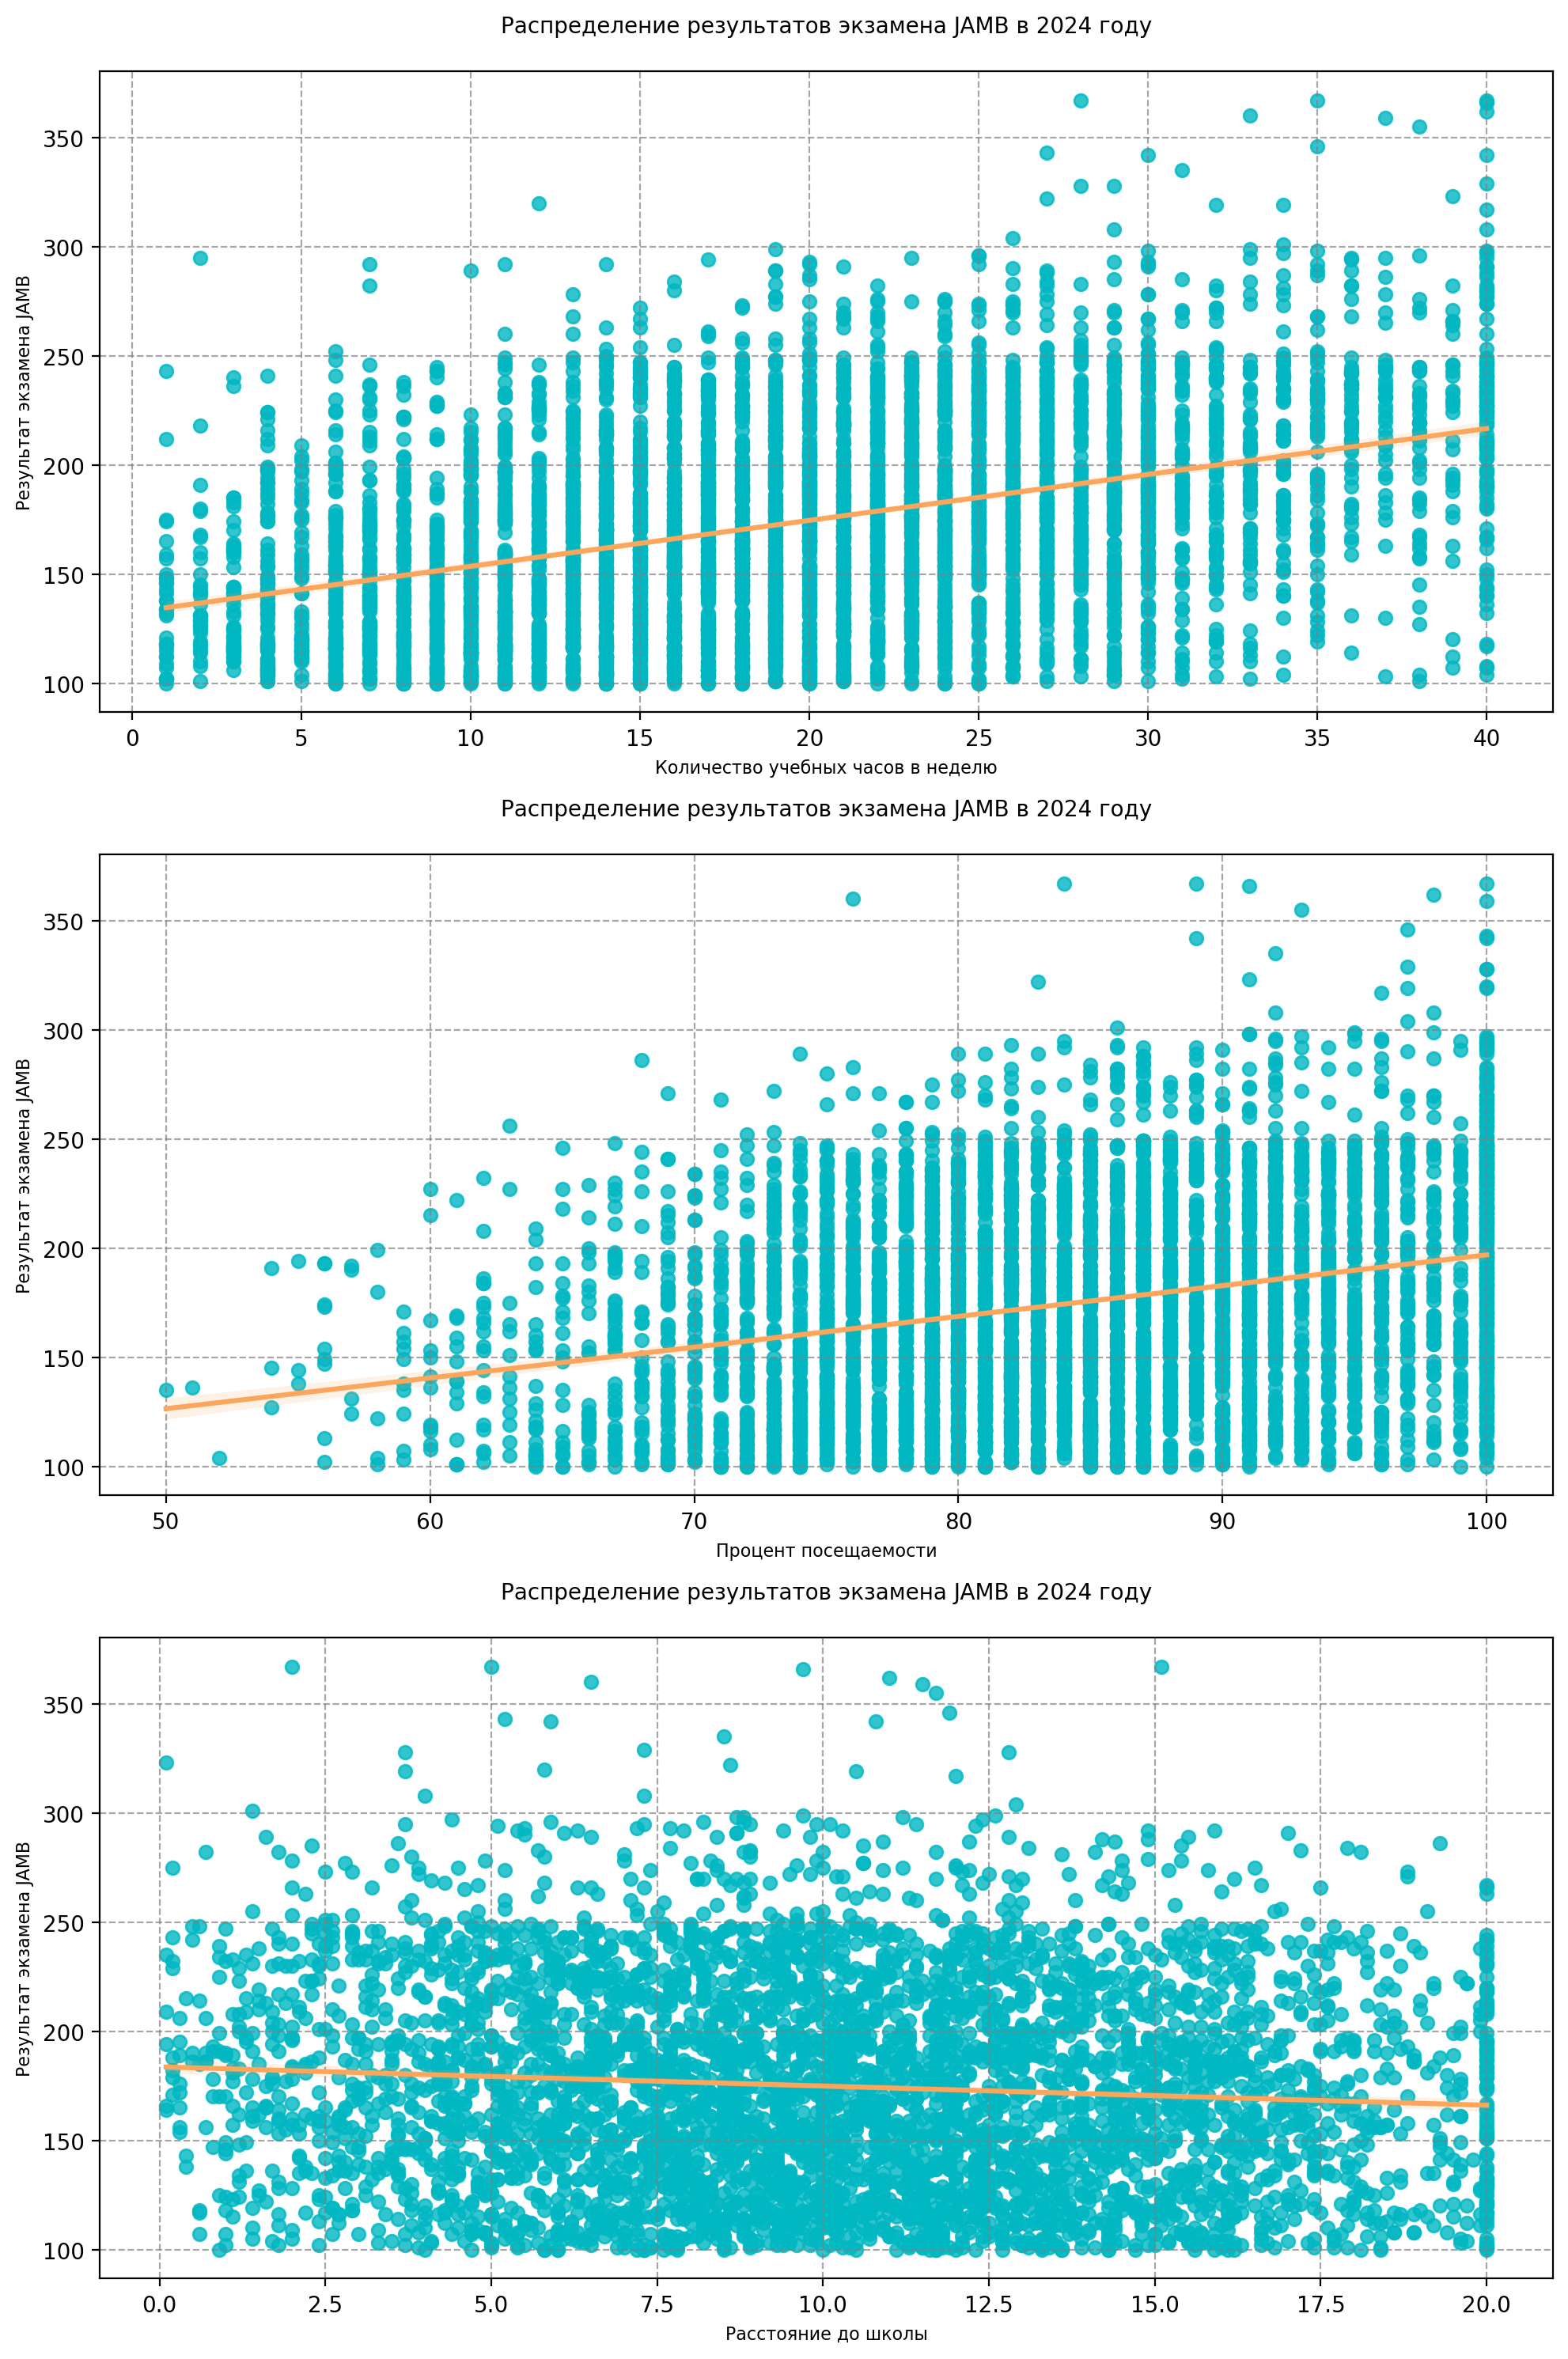

In [40]:
# построение диаграмм рассеяния для числовых признаков

fig, axs = plt.subplots(3, 1, figsize=(10, 15))

sns.regplot(data=jamb, x='study_hours_per_week', y='jamb_score', ax=axs[0], color='#00b7c2',\
            line_kws={'color': '#FCA65D'})
axs[0].set_title('Распределение результатов экзамена JAMB в 2024 году\n', fontsize=10)
axs[0].set_xlabel('Количество учебных часов в неделю', fontsize=8)
axs[0].set_ylabel('Результат экзамена JAMB', fontsize=8)
axs[0].grid(linestyle='--', color='gray', alpha=0.7)

sns.regplot(data=jamb, x='attendance_rate', y='jamb_score', ax=axs[1], color='#00b7c2',\
            line_kws={'color': '#FCA65D'})
axs[1].set_title('Распределение результатов экзамена JAMB в 2024 году\n', fontsize=10)
axs[1].set_xlabel('Процент посещаемости', fontsize=8)
axs[1].set_ylabel('Результат экзамена JAMB', fontsize=8)
axs[1].grid(linestyle='--', color='gray', alpha=0.7)

sns.regplot(data=jamb, x='distance_to_school', y='jamb_score', ax=axs[2], color='#00b7c2',\
            line_kws={'color': '#FCA65D'})
axs[2].set_title('Распределение результатов экзамена JAMB в 2024 году\n', fontsize=10)
axs[2].set_xlabel('Расстояние до школы', fontsize=8)
axs[2].set_ylabel('Результат экзамена JAMB', fontsize=8)
axs[2].grid(linestyle='--', color='gray', alpha=0.7)

plt.tight_layout()
plt.show()

📌 **Выводы:**
* На диаграмме рассеяния результатов экзамена в зависимости от количества учебных часов в неделю видим положительную взаимосвязь: студенты, уделяющие больше времени учебе, получали более высокие результаты за экзамен;
* На диаграмме рассеяния результатов экзамена в зависимости от процента посещаемости школы также наблюдается положительная корреляция: студенты, чаще посещающие школу, набрали на экзамене больше баллов;
* Отметим незначительную отрицательную связь на диаграмме рассеяния результатов экзамена в зависимости от расстояния до школы: чем дальше студент живет от школы, тем меньше баллов он набирает.  

### Исследование категориальных признаков

Для анализа распределения данных по признакам `gender`, `school_type` и `school_location` построим круговые диаграммы: 

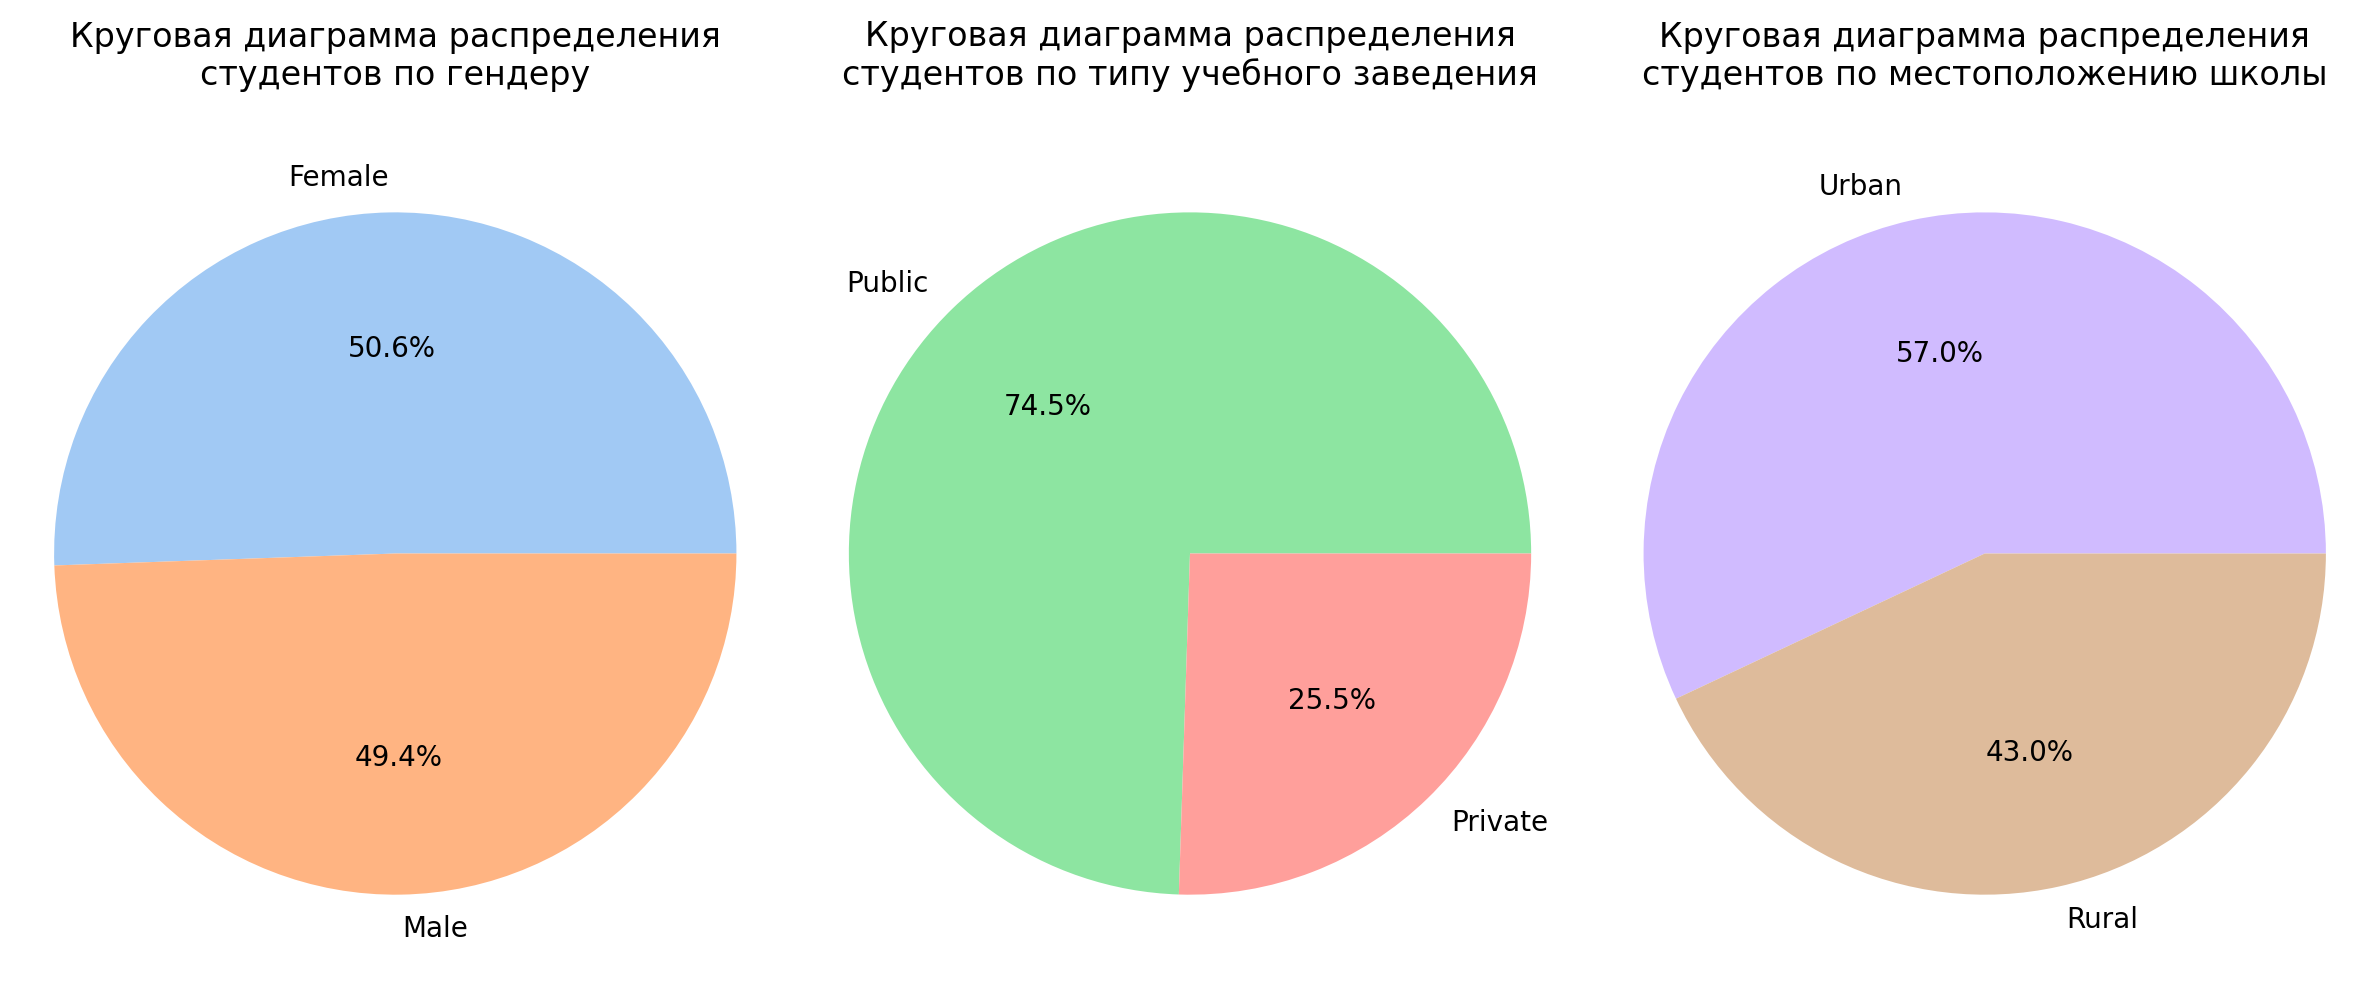

In [48]:
# построение круговых диаграмм распределения категориальных признаков

fig, axs = plt.subplots(1, 3, figsize=(12, 5))

gender_counts = jamb['gender'].value_counts()
axs[0].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors = sns.color_palette('pastel'))
axs[0].axis('equal')
axs[0].set_title('Круговая диаграмма распределения\nстудентов по гендеру\n')

school_type_counts = jamb['school_type'].value_counts()
axs[1].pie(school_type_counts, labels=school_type_counts.index, autopct='%1.1f%%', colors = sns.color_palette('pastel')[2:4])
axs[1].axis('equal')
axs[1].set_title('Круговая диаграмма распределения\nстудентов по типу учебного заведения\n')

school_loc_counts = jamb['school_location'].value_counts()
axs[2].pie(school_loc_counts, labels=school_loc_counts.index, autopct='%1.1f%%', colors = sns.color_palette('pastel')[4:6])
axs[2].axis('equal')
axs[2].set_title('Круговая диаграмма распределения\nстудентов по местоположению школы\n')

plt.tight_layout()
plt.show()

📌 **Выводы:**
* В датасете представлено примерно одинаковое количество студентов обоих гендеров;
* Около 75% студентов учатся в общеобразовательной школе, и только 25% являются студентами частной;
* Чуть больше школ находится в городе нежели в деревне, хотя эта разница небольшая. 

Для анализа распределения данных по признакам `socioeconomic_status`, `parent_involvement` и `parent_education_level` построим столбчатые диаграммы: 

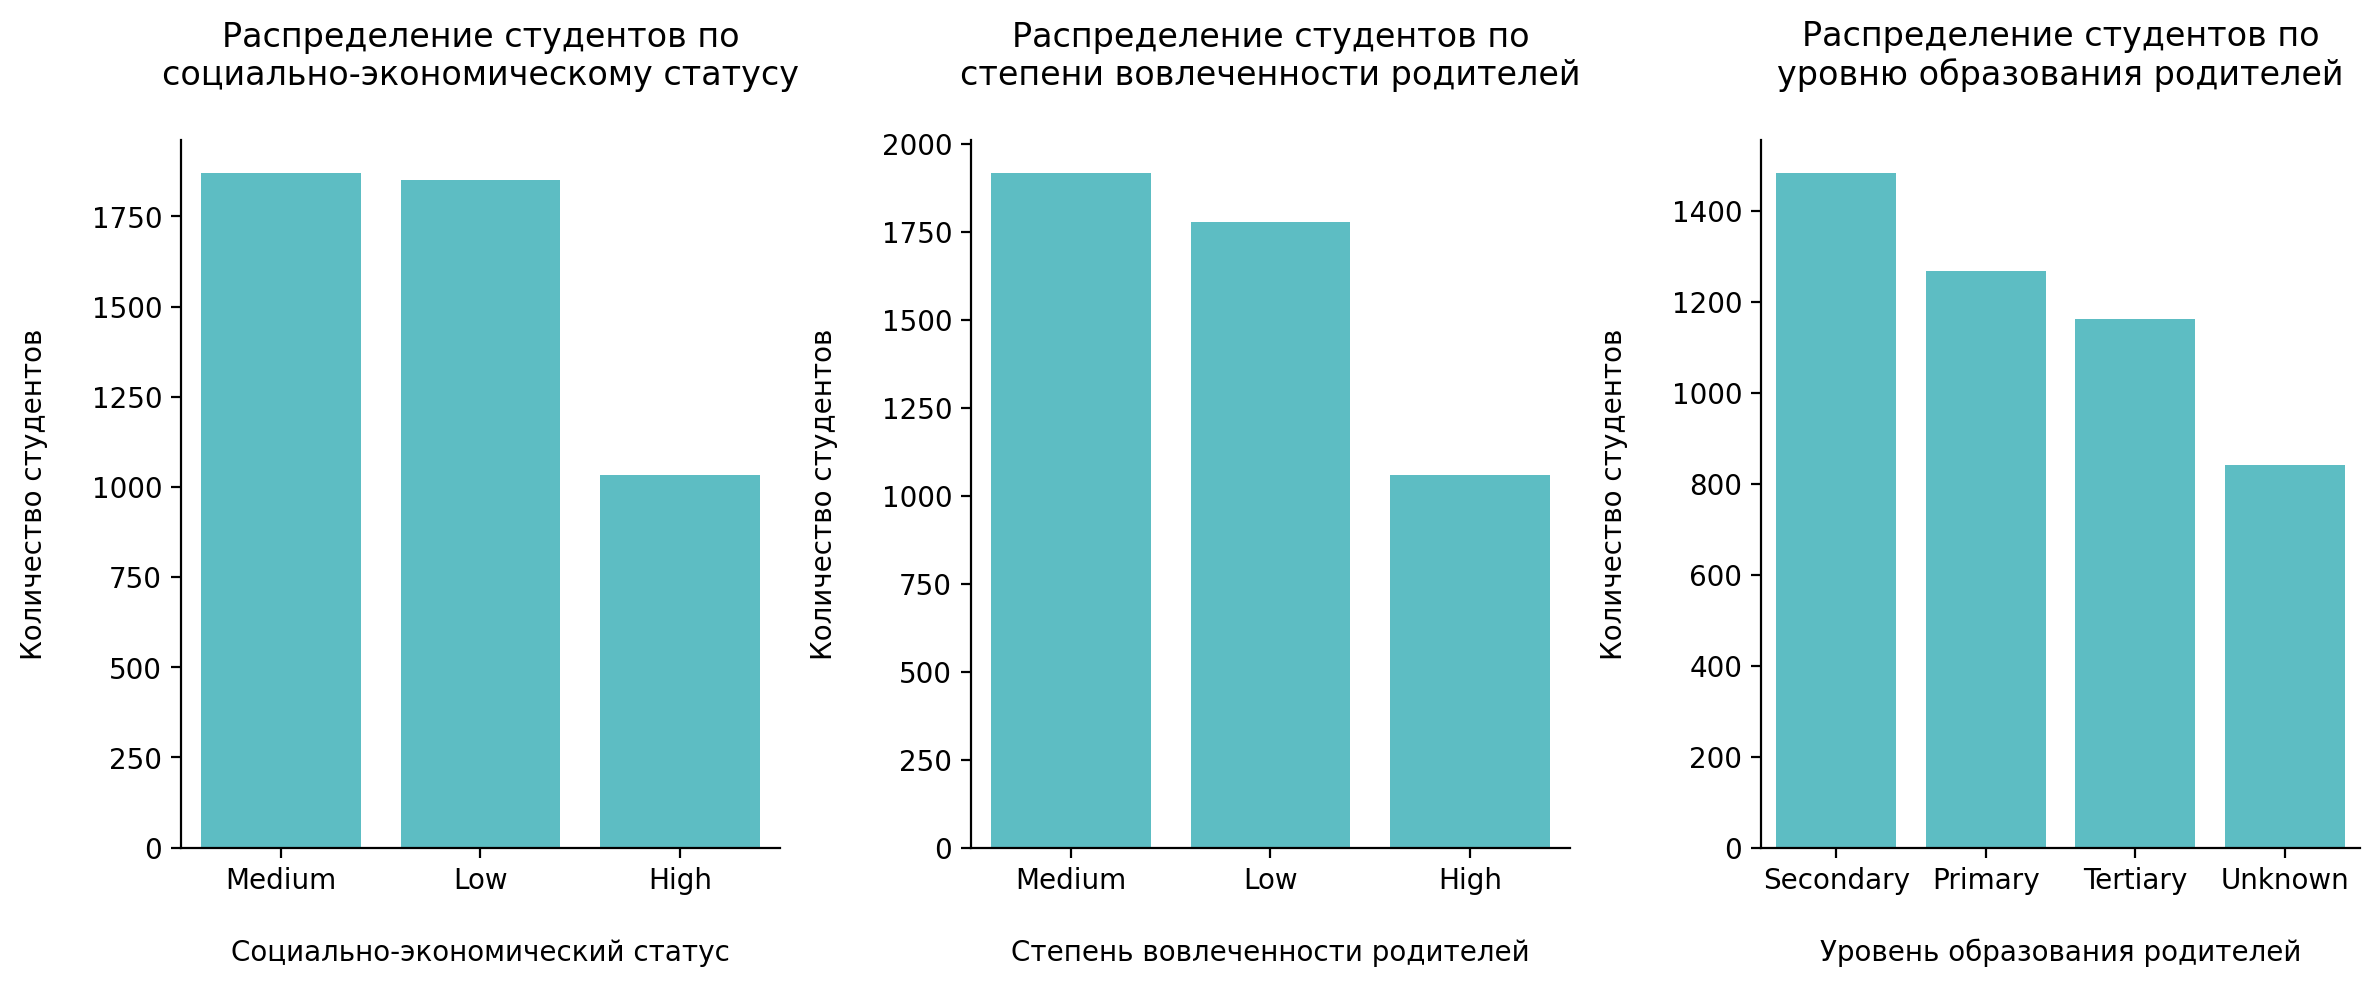

In [49]:
# построение столбчатых диаграмм распределения категориальных признаков

fig, axs = plt.subplots(1, 3, figsize=(12, 5))

soc_status_counts = jamb['socioeconomic_status'].value_counts().reset_index()
soc_status_counts.columns = ['socioeconomic_status', 'count']
sns.barplot(data=soc_status_counts, x='socioeconomic_status', y='count', ax=axs[0], color='#00b7c2', alpha=0.7)
axs[0].set_title('Распределение студентов по\nсоциально-экономическому статусу\n')
axs[0].set_xlabel('\nСоциально-экономический статус')
axs[0].set_ylabel('Количество студентов\n')
axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)

parent_involve_counts = jamb['parent_involvement'].value_counts().reset_index()
parent_involve_counts.columns = ['parent_involvement', 'count']
sns.barplot(data=parent_involve_counts, x='parent_involvement', y='count', ax=axs[1], color='#00b7c2', alpha=0.7)
axs[1].set_title('Распределение студентов по\nстепени вовлеченности родителей\n')
axs[1].set_xlabel('\nСтепень вовлеченности родителей')
axs[1].set_ylabel('Количество студентов\n')
axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)

parent_ed_counts = jamb['parent_education_level'].value_counts().reset_index()
parent_ed_counts.columns = ['parent_education_level', 'count']
sns.barplot(data=parent_ed_counts, x='parent_education_level', y='count', ax=axs[2], color='#00b7c2', alpha=0.7)
axs[2].set_title('Распределение студентов по\nуровню образования родителей\n')
axs[2].set_xlabel('\nУровень образования родителей')
axs[2].set_ylabel('Количество студентов\n')
axs[2].spines['top'].set_visible(False)
axs[2].spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

📌 **Выводы:**
* Семьи более 3500 студентов (>70% данных) обладают средним или низким социально-экономическим статусом;
* Степень вовлеченности родителей большинство студентом оценивают средней;
* Большинство родителей представленных студентов имеют среднее образование. 

### <span style="color:blue"> Заголовок в процессе </span>

#### Исследование влияния гендера на результат экзамена

Построим столбчатую диаграмму распределения результатов за экзамен в зависимости от пола студента:

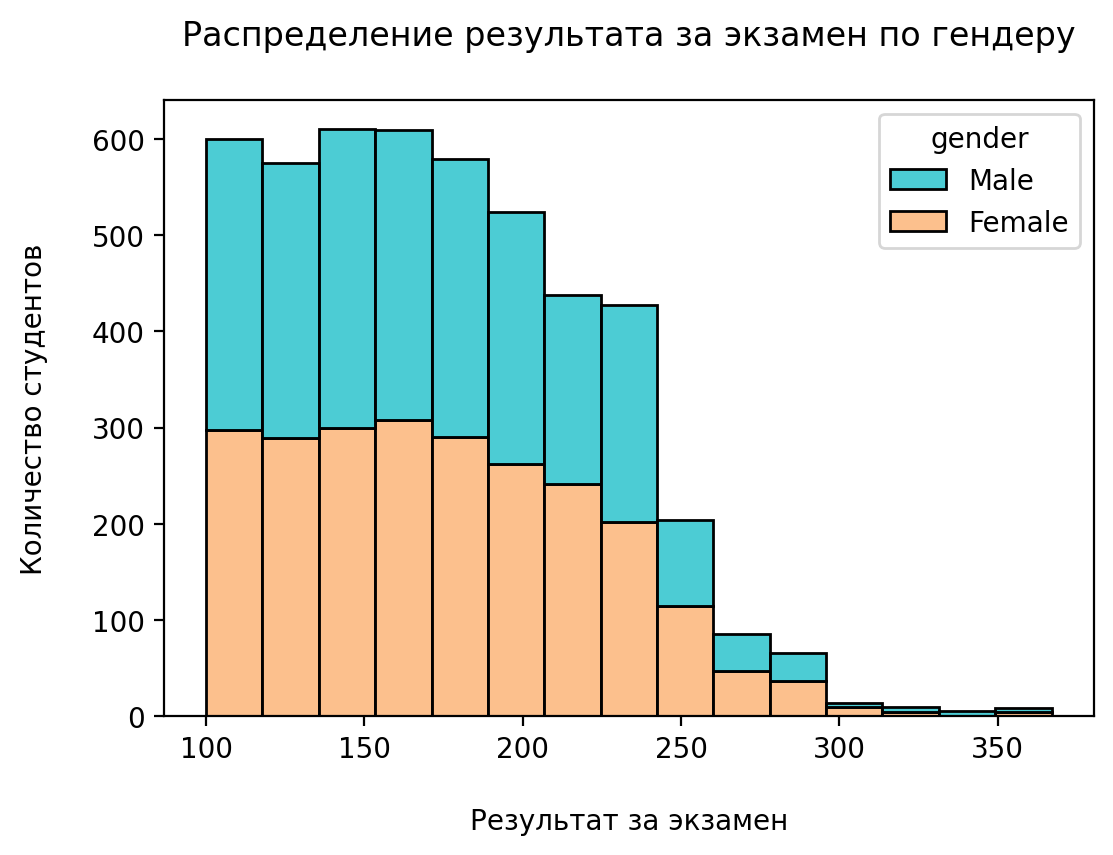

In [59]:
# столбчатая диаграмма результатов экзамена в зависимости от пола

plt.figure(figsize=(6,4))

sns.histplot(data=jamb, x='jamb_score', bins=15, color='#00b7c2', alpha=0.7, hue='gender', multiple='stack',\
            palette={'Male': '#00b7c2', 'Female': '#FCA65D'})
plt.title('Распределение результата за экзамен по гендеру\n')
plt.xlabel('\nРезультат за экзамен')
plt.ylabel('Количество студентов\n')

plt.show()

📌 **Выводы:**
* Заметим, что для результатов от 100 до 200 баллов распределение между мужчинами и женщинами примерно одинаковое. Для результатов более 200 баллов можно отметить, что доля девушек с такими результатами выше доли мужчин. 

#### Тип школы и результат экзамена

Построим столбчатую диаграмму распределения результатов за экзамен в зависимости от типа учебного заведения:

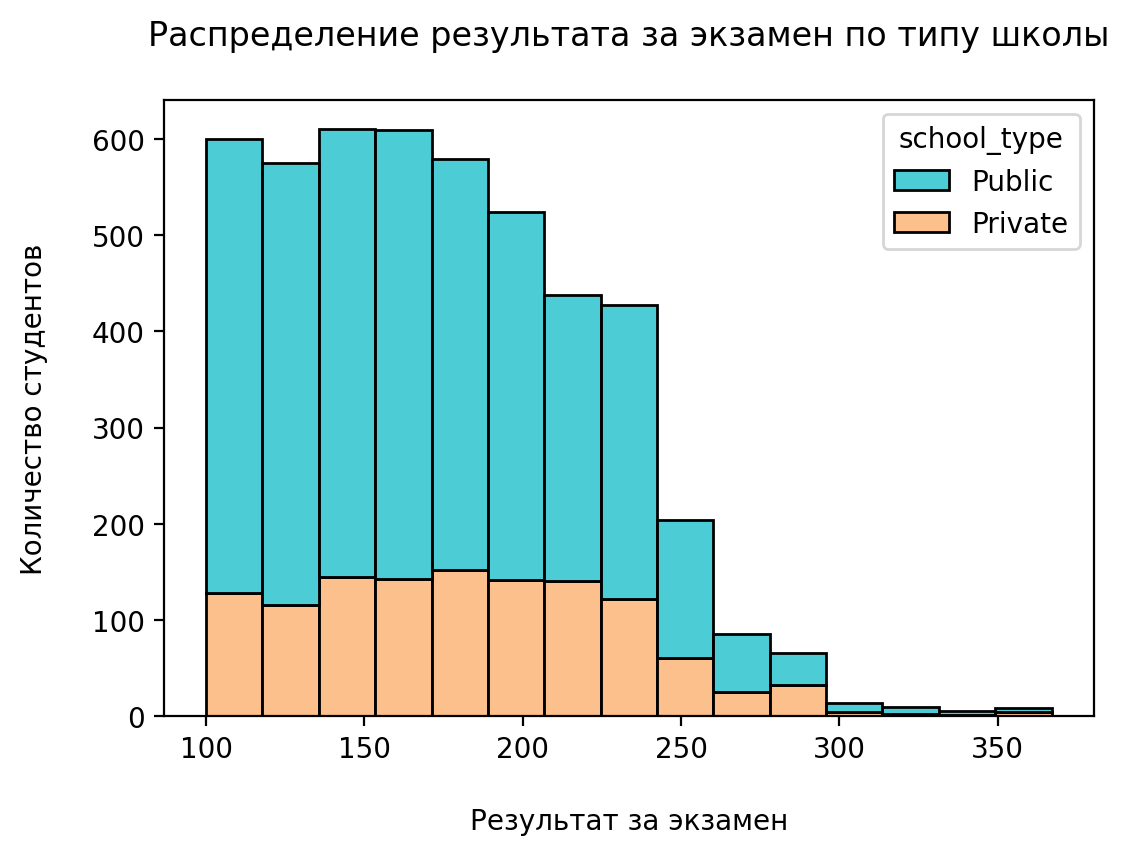

In [77]:
# столбчатая диаграмма результатов экзамена в зависимости от типа школы

plt.figure(figsize=(6,4))

sns.histplot(data=jamb, x='jamb_score', bins=15, color='#00b7c2', alpha=0.7, hue='school_type',\
             multiple='stack', palette={'Public': '#00b7c2', 'Private': '#FCA65D'})
plt.title('Распределение результата за экзамен по типу школы\n')
plt.xlabel('\nРезультат за экзамен')
plt.ylabel('Количество студентов\n')

plt.show()

📌 **Выводы:**
* Так как студентов частных школ ≈в 3 раза меньше, чем студентов общеобразовательных, видим, что почти для всех баллов сохраняется тенденция в пропорциональности: доля студентов общеобразовательных школ выше. Однако для результата, близкого к 300 баллов можно заметить равенство долей. 

#### Вовлеченность родителей и результат экзамена

Построим боксплот, чтобы посмотреть на распределение результатов за экзамен в зависимости от вовлеченности родителей:

/var/folders/dj/sgs68j8x32nd0_lcm57msy3c0000gn/T/ipykernel_57625/3502081025.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=jamb, x='parent_involvement', y='jamb_score', palette='pastel',\


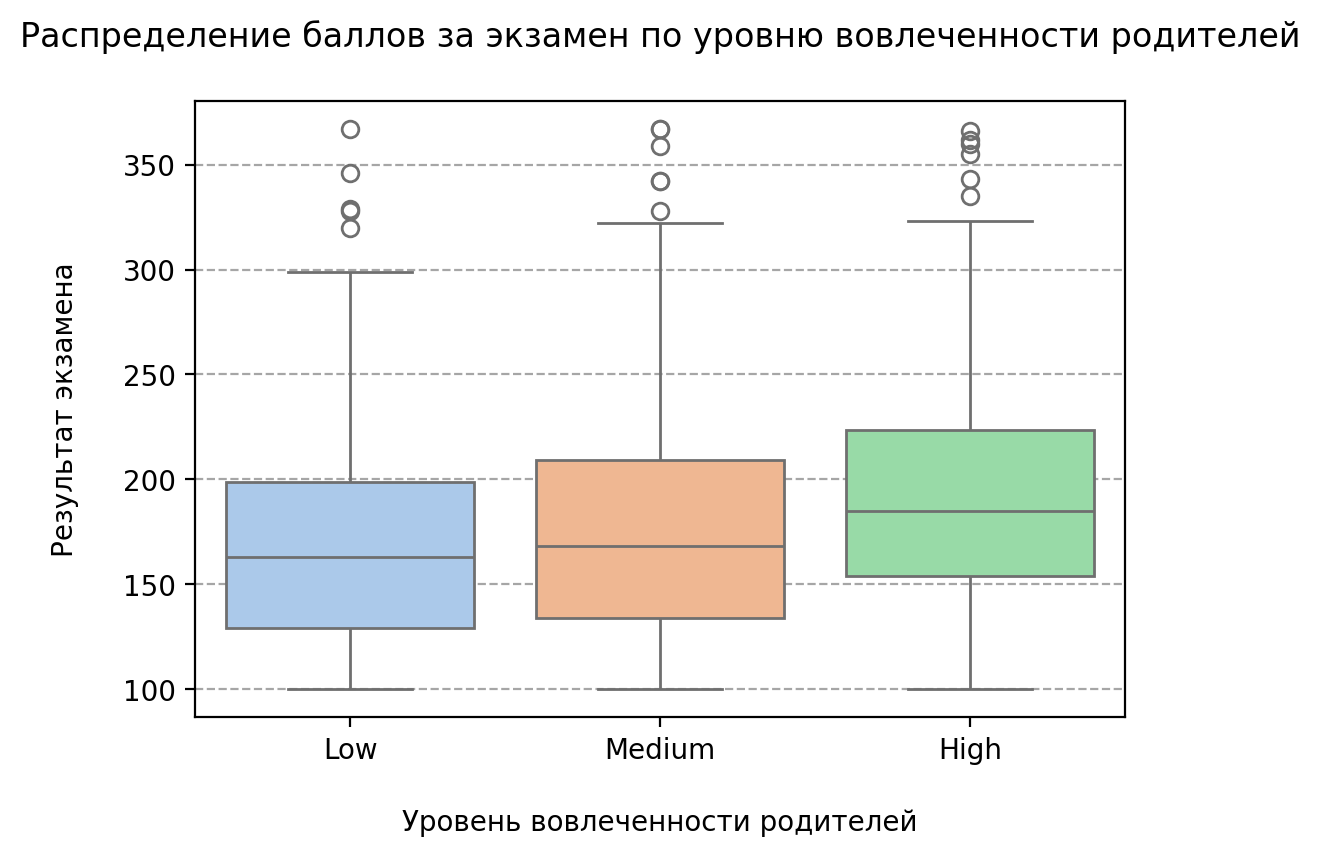

In [80]:
# боксплот результатов за экзамен в зависимости от степени вовлеченности родителей

plt.figure(figsize=(6, 4))
sns.boxplot(data=jamb, x='parent_involvement', y='jamb_score', palette='pastel',\
           order=['Low', 'Medium', 'High'])
plt.title('Распределение баллов за экзамен по уровню вовлеченности родителей\n')
plt.xlabel('\nУровень вовлеченности родителей')
plt.ylabel('Результат экзамена\n')
plt.grid(axis='y', linestyle='--', color='gray', alpha=0.7)

plt.show()

📌 **Выводы:**
* Наиболее высокий медианный балл демонстрируют студенты с высокой вовлеченностью родителей в учебный процесс. Средняя половина результатов таких студентов находится в диапазоне от 150 до ≈230 баллов;
* Медианный балл у студентов со средней родительской вовлеченностью и низкой примерно одинаковый: ≈170 баллов. Средняя половина баллов у студентов со средней родительской вовлеченностью находится в диапазоне от ≈140 до ≈210 баллов, а у студентов с низкой вовлеченностью родителей – от ≈130 до ≈200 баллов.
* Несмотря на степень вовлеченности родителей, во всех категориях есть одаренные студенты с аномально высокими результатами для данного датасета. 

#### Социально-экономическое положение семьи студента и результат экзамена

Построим боксплот, чтобы посмотреть на распределение результатов за экзамен в зависимости от социально-экономического положения семьи студента:

/var/folders/dj/sgs68j8x32nd0_lcm57msy3c0000gn/T/ipykernel_57625/3157890893.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=jamb, x='socioeconomic_status', y='jamb_score', palette='pastel',\


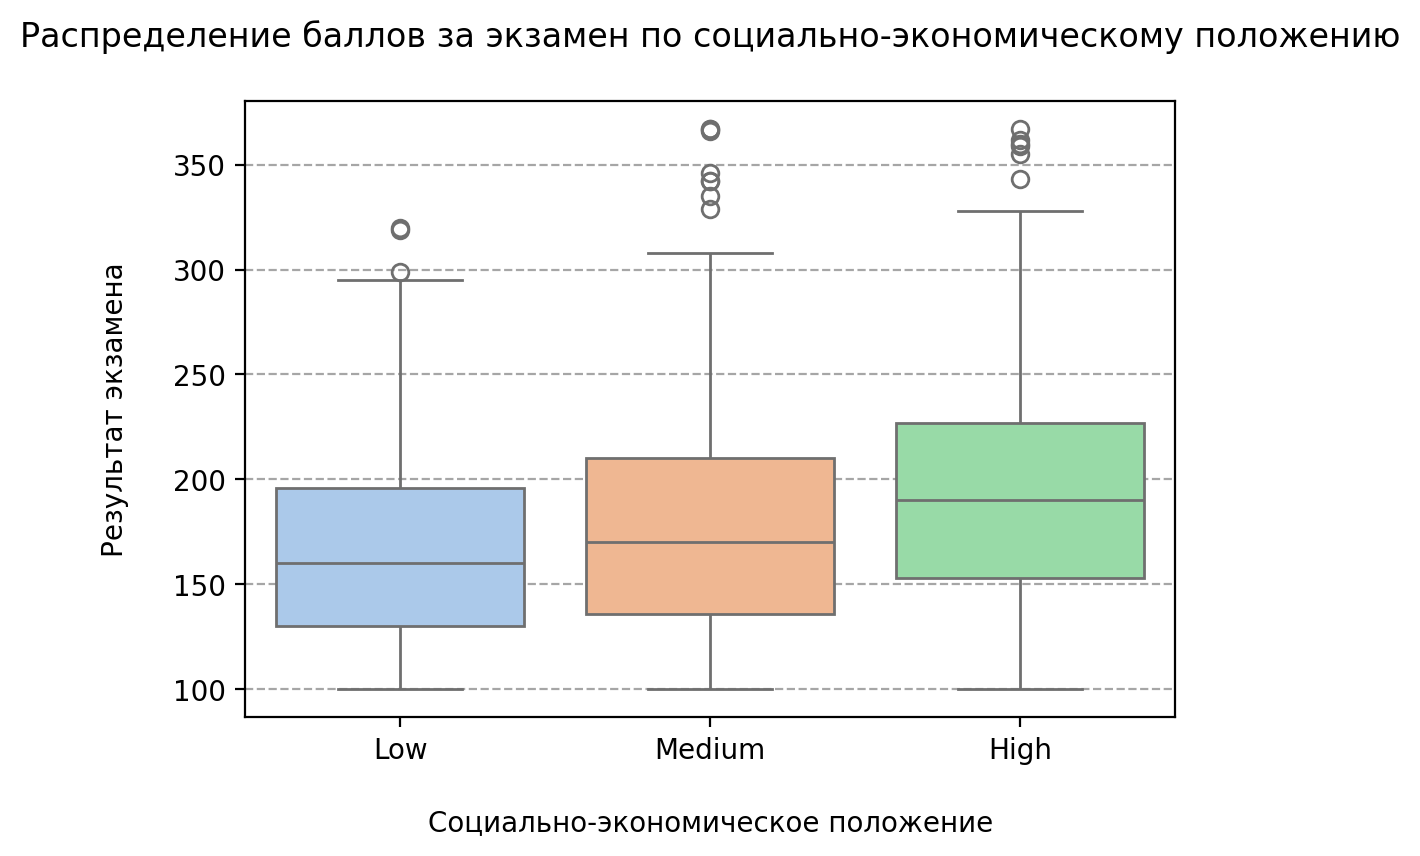

In [82]:
# боксплот результатов за экзамен в зависимости от социально-экономического положения

plt.figure(figsize=(6, 4))
sns.boxplot(data=jamb, x='socioeconomic_status', y='jamb_score', palette='pastel',\
           order=['Low', 'Medium', 'High'])
plt.title('Распределение баллов за экзамен по социально-экономическому положению\n')
plt.xlabel('\nСоциально-экономическое положение')
plt.ylabel('Результат экзамена\n')
plt.grid(axis='y', linestyle='--', color='gray', alpha=0.7)

plt.show()

📌 **Выводы:**
* Наиболее высокий медианный балл демонстрируют студенты с высоким социально-экономическим положением – ≈180.  Средняя половина результатов таких студентов находится в диапазоне от 150 до ≈230 баллов;
* Медианный балл у студентов со средним соц-экономическим положением составляет ≈170 баллов. Средняя половина баллов у студентов находится в диапазоне от ≈140 до ≈210 баллов;
* Для студентов с низким соц-экономическим положением медианный результат составляет ≈160 баллов. Средняя половина баллов у таких студентов находится в диапазоне от ≈135 до ≈190 баллов;
* Можно заключить, что чем лучше социально-экономическое положение семьи, тем лучше студент справляется со вступительными экзаменами. 

#### Уровень образования родителей и результат экзамена

Построим боксплот, чтобы посмотреть на распределение результатов за экзамен в зависимости от уровня образования родителей:

/var/folders/dj/sgs68j8x32nd0_lcm57msy3c0000gn/T/ipykernel_57625/33294161.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=jamb, x='parent_education_level', y='jamb_score', palette='pastel',\


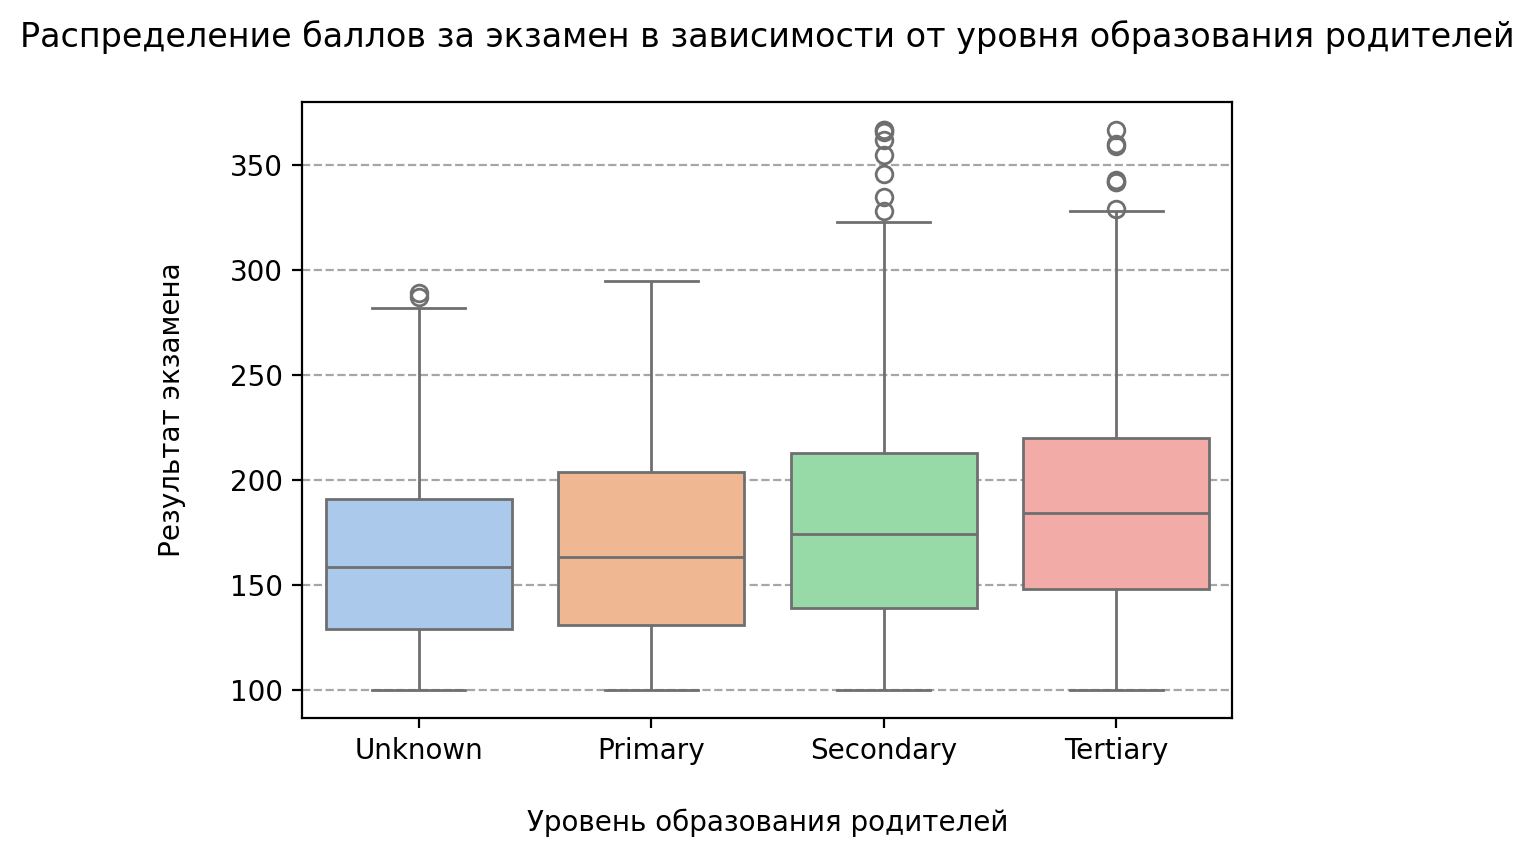

In [86]:
# боксплот результатов за экзамен в зависимости от уровня образования родителей

plt.figure(figsize=(6, 4))
sns.boxplot(data=jamb, x='parent_education_level', y='jamb_score', palette='pastel',\
           order=['Unknown', 'Primary', 'Secondary', 'Tertiary']) 
plt.title('Распределение баллов за экзамен в зависимости от уровня образования родителей\n')
plt.xlabel('\nУровень образования родителей')
plt.ylabel('Результат экзамена\n')
plt.grid(axis='y', linestyle='--', color='gray', alpha=0.7)

plt.show()

📌 **Выводы:**
* Наиболее высокий медианный балл демонстрируют студенты, чьи родители имеют высшее образование – ≈170 баллов. Средняя половина результатов таких студентов находится в диапазоне от 150 до ≈230 баллов;
* Медианный балл у студентов, чьи родители имеют среднее образование, составляет ≈175 баллов. Средняя половина результатов таких студентов находится в диапазоне от ≈140 до ≈220 баллов;
* Для студентов, чьи родители имеют начальное образование, медианный балл составляет ≈165 баллов. Средняя половина результатов находится в диапазоне от ≈130 до ≈200 баллов. Отметим также, что среди студентов этой категории нет аномально высоких результатов. 

### Матрица корреляций между числовыми характеристиками

Построим матрицу корреляций между признаками, чтобы увидеть, какие признаки могут влиять на другие:

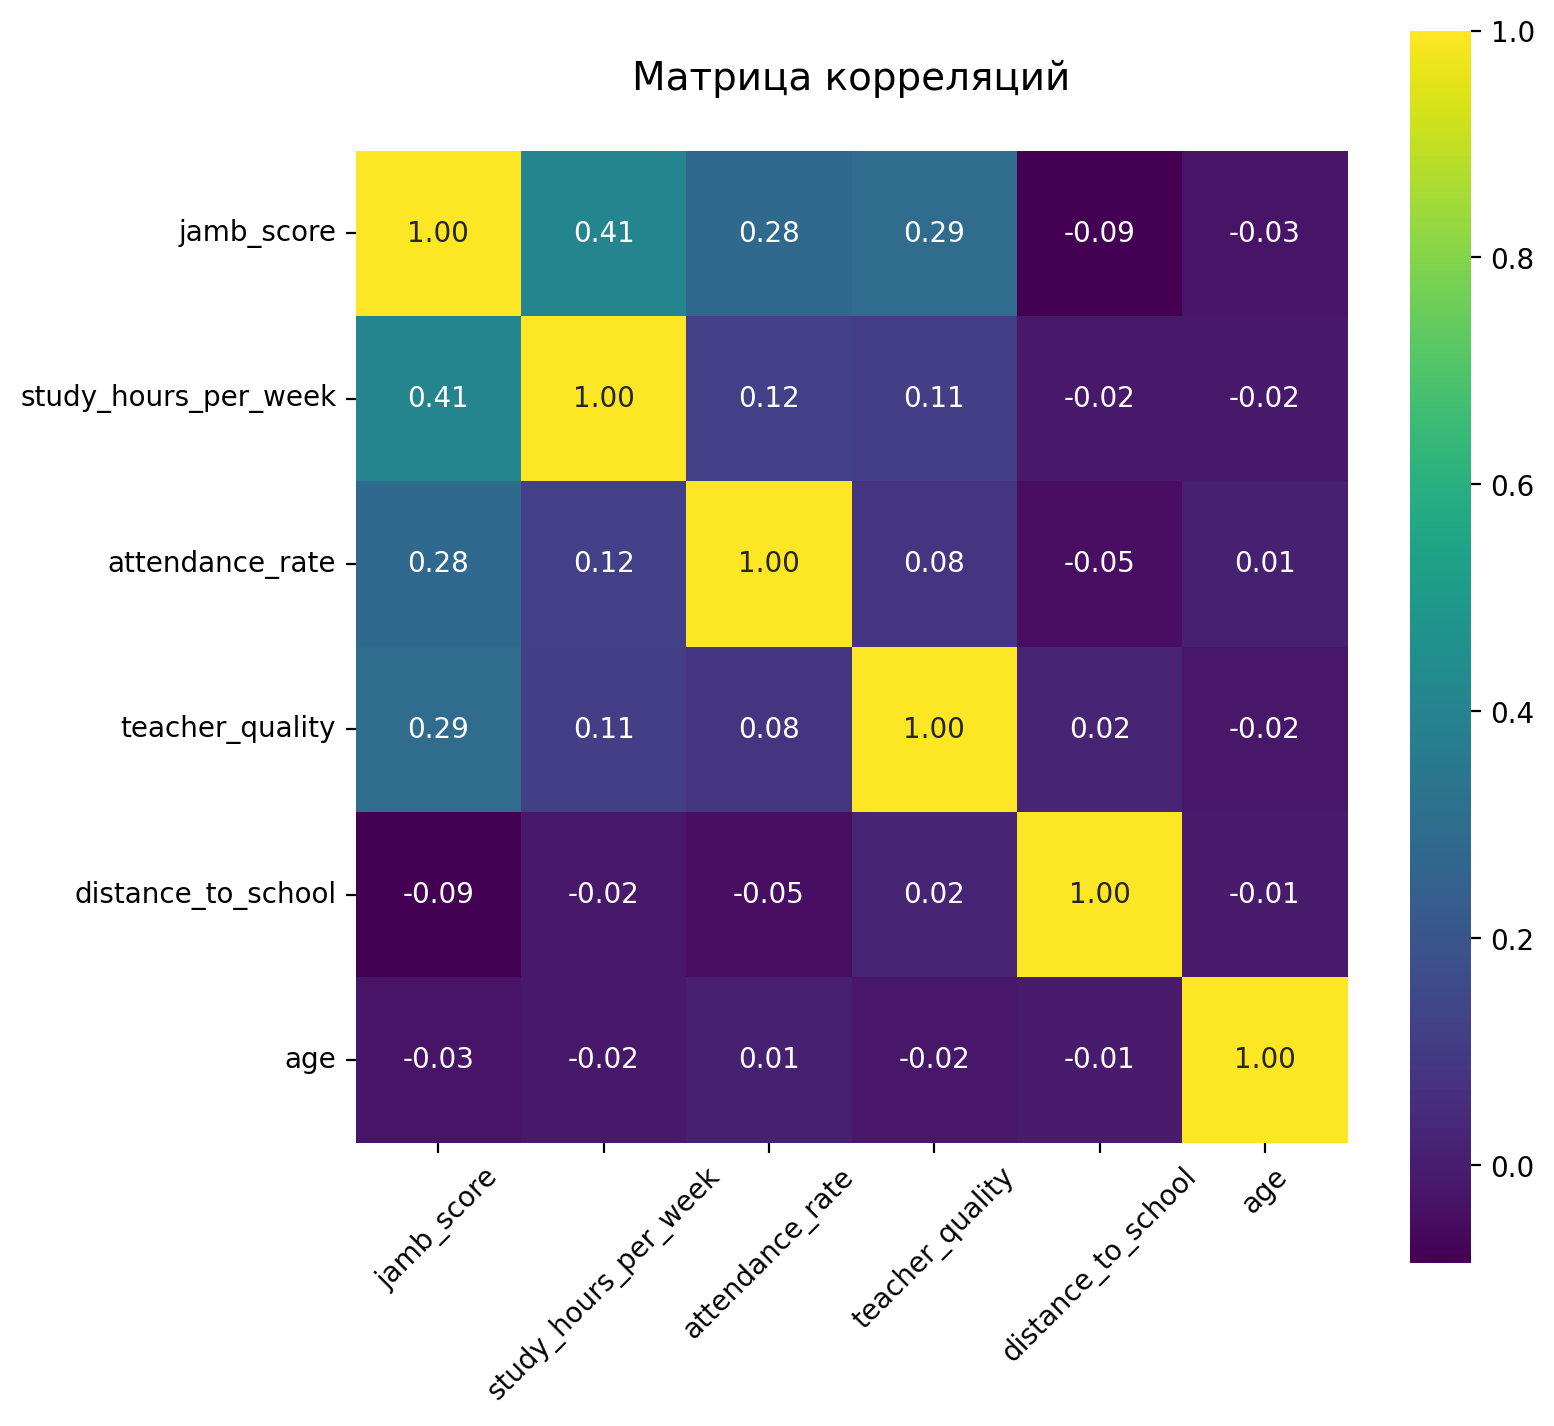

In [87]:
# построение матрицы корреляций для количественных переменных

jamb_numeric = jamb[['jamb_score', 'study_hours_per_week', 'attendance_rate', 'teacher_quality',
                    'distance_to_school', 'age']]
correlation_matrix = jamb_numeric.corr()

plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='viridis', square=True)
plt.title('Матрица корреляций\n', fontsize=14)
plt.xticks(rotation=45)

plt.show()

📌 **Выводы:**
* Среди представленных числовых признаков нет тех, что сильно коррелируют между собой;
* Cуществует слабая положительная связь между количеством учебных часов и результатами экзамена (≈0.42), оценкой качества преподавания и результатом экзаменама (≈0.30), а также процентом дней, которые студент посещал школу в течение учебного года, и результатом экзамена (≈0.28).  